# Problem: Predictive loan model for an applicant

## Objective:

Predict the risk of a loan being default based on the past loan data, for a given loan applicant

Dataset:
 https://drive.google.com/drive/folders/1XCKR-Gdw9yziWWW6TVvx5wvArFkP96PP 

 Dataset will be provided in parts

Prep work required:

Data for 3 quarters will be provided to the students, with a select subset of features. This will be used for prep work and initial baselining.

 Identification of the performance parameters to be improved, for the given problem statement

 Baseline performance figures for 5 different ML classifiers, after minimal data pre-processing, Baseline figures must include (i) accuracy (ii) classification report (iii) confusion matrix (iv) ROC-AUC and AUPRC scores. One of the classifiers must be ANN.

 Observations from exploratory analysis of the dataset

 Outline of feature engineering techniques that may be used to improve the classifier
performance

# Performance

Session 1:

The complete dataset (with data for 2 more years and all features) will be provided.
 Shortlist 3 best performing classifiers, from the prep work
 Apply relevant feature engineering techniques on the dataset provided
 Compare the performance of the 3 classifiers with the baseline performance figured obtained
during prep-work
 Note down the features that figure high in feature ranking

Session 2:
 Apply ensemble techniques to observe their impact on the performance of the classifiers 

Session 3:
 Group presentation

# DataSet Description:

In [1]:
import os
import pandas as pd
def read_csv_data(dir_name):
    '''
    Arg: Directory Name
    Return: List of CSV files from a directory'''
    list_of_files=os.listdir(dir_name)
    return [file for file in list_of_files if file.endswith(".csv")]

def read_list_csv_to_pandas(list_of_csv_files):
    '''
    Arg: List of csv files name
    Return: Pandas dataframe with all file
    Assumption: ALl the files have same format'''
    pandas_list=[]
    for file in list_of_csv_files:
        pandas_list.append(pd.read_csv(os.path.join(utils['raw_data_path'],file),skiprows=1,parse_dates=['issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d','hardship_start_date','hardship_end_date','payment_plan_start_date','debt_settlement_flag_date','settlement_date','earliest_cr_line']))
    merged_file=pd.concat(pandas_list)
    return merged_file

#After analysis we found that some are date column

In [2]:
DATA_PATH='./'

utils={
    'raw_data_path':DATA_PATH
}

In [3]:
list_of_files=read_csv_data(utils['raw_data_path'])
list_of_files

['LoanStats_securev1_2017Q1.csv',
 'LoanStats_securev1_2017Q2.csv',
 'LoanStats3c_securev1_2014.csv',
 'LoanStats_securev1_2017Q3.csv',
 'LoanStats3d_securev1_2015.csv']

In [4]:
!head -n 5 /Users/mghosh2/Downloads/loan_data/LoanStats_securev1_2017Q1.csv
## It looks like first row is not useful

head: /Users/mghosh2/Downloads/loan_data/LoanStats_securev1_2017Q1.csv: No such file or directory


In [5]:
data_raw = read_list_csv_to_pandas(list_of_files)
data_raw.head()

/Users/magrawal2/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,118,146) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/magrawal2/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,146) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/magrawal2/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,19,129,130,131,139) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/magrawal2/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,129,130,131,139,146) have mixed types.Specify dtype option on import or set low_memory=False.
  if (aw

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104046719,NaN,14000.0,14000.0,14000.0,36 months,15.99%,492.13,C,C5,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
1,104048967,NaN,5000.0,5000.0,5000.0,36 months,25.49%,200.10,E,E4,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
2,104028593,NaN,4600.0,4600.0,4600.0,36 months,11.39%,151.45,B,B3,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
3,104046702,NaN,14000.0,14000.0,14000.0,60 months,12.74%,316.69,C,C1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
4,104280113,NaN,15000.0,15000.0,15000.0,36 months,5.32%,451.73,A,A1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN


In [6]:
", ".join(list(data_raw.columns))

'id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util,

In [7]:
data_raw['loan_status'].value_counts()

Current               500937
Fully Paid            358629
Charged Off            99099
Late (31-120 days)     13203
In Grace Period         6337
Late (16-30 days)       3414
Default                   36
Name: loan_status, dtype: int64

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

#To plot figs on jupyter
%matplotlib inline


In [11]:
def colume_details(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Non_Missing'] = df.shape[0] - summary['Missing']
    summary['Percent_Missing'] = summary['Missing']/df.shape[0]
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [12]:
data_raw=data_raw.reset_index().drop(['index'],axis=1)
pd.set_option('display.max_rows', 152)
column_explantion=colume_details(data_raw)
column_explantion[column_explantion['dtypes']=='object']

Dataset Shape: (981665, 151)


,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,object,0,981665,0.000000,981665,104046719,104048967,104028593,19.90
5,term,object,10,981655,0.000010,2,36 months,36 months,36 months,0.89
6,int_rate,object,10,981655,0.000010,201,15.99%,25.49%,11.39%,6.74
8,grade,object,10,981655,0.000010,7,C,E,B,2.32
9,sub_grade,object,10,981655,0.000010,35,C5,E4,B3,4.62
10,emp_title,object,59595,922070,0.060708,232289,Project Leader,Pilot,cable technician,13.91
11,emp_length,object,57995,923670,0.059078,11,10+ years,10+ years,4 years,3.04
12,home_ownership,object,10,981655,0.000010,5,MORTGAGE,MORTGAGE,RENT,1.38
14,verification_status,object,10,981655,0.000010,3,Source Verified,Source Verified,Not Verified,1.57
16,loan_status,object,10,981655,0.000010,7,Current,Current,Current,1.52


In [13]:
column_explantion[column_explantion['dtypes']!='object']

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
1,member_id,float64,981665,0,1.000000,0,NaN,NaN,NaN,0.00
2,loan_amnt,float64,10,981655,0.000010,1549,14000,5000,4600,6.91
3,funded_amnt,float64,10,981655,0.000010,1549,14000,5000,4600,6.91
4,funded_amnt_inv,float64,10,981655,0.000010,1556,14000,5000,4600,7.18
7,installment,float64,10,981655,0.000010,67063,492.13,200.1,151.45,13.45
13,annual_inc,float64,10,981655,0.000010,51776,82000,215000,44470,8.25
15,issue_d,datetime64[ns],10,981655,0.000010,33,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,4.95
24,dti,float64,304,981361,0.000310,7006,31.07,6.06,13.43,11.74
25,delinq_2yrs,float64,10,981655,0.000010,31,0,0,0,1.07
26,earliest_cr_line,datetime64[ns],10,981655,0.000010,712,1996-05-01 00:00:00,2004-01-01 00:00:00,2003-12-01 00:00:00,8.43


In [14]:
date_columns=[x  for x in list(data_raw.columns) if x.endswith('d') or x.endswith('date')]
date_columns
## Not all are date columns so just an approximation

['id',
 'member_id',
 'issue_d',
 'mths_since_last_record',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'num_accts_ever_120_pd',
 'num_tl_30dpd',
 'sec_app_collections_12_mths_ex_med',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_dpd',
 'disbursement_method',
 'debt_settlement_flag_date',
 'settlement_date']

In [15]:
column_explantion[column_explantion['dtypes']=='datetime64[ns]']
##Columns with high null values (more than ratio 0.999) are rejected
# We have to work with  'issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d' this date columns

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
15,issue_d,datetime64[ns],10,981655,0.000010,33,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,4.95
26,earliest_cr_line,datetime64[ns],10,981655,0.000010,712,1996-05-01 00:00:00,2004-01-01 00:00:00,2003-12-01 00:00:00,8.43
47,last_pymnt_d,datetime64[ns],878,980787,0.000894,47,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,3.52
49,next_pymnt_d,datetime64[ns],457738,523927,0.466287,3,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00,0.01
50,last_credit_pull_d,datetime64[ns],50,981615,0.000051,48,2017-12-01 00:00:00,2017-12-01 00:00:00,2017-12-01 00:00:00,2.22
134,hardship_start_date,datetime64[ns],978661,3004,0.996940,11,NaT,NaT,NaT,2.52
135,hardship_end_date,datetime64[ns],978661,3004,0.996940,13,NaT,NaT,NaT,2.75
136,payment_plan_start_date,datetime64[ns],978661,3004,0.996940,12,NaT,NaT,NaT,2.72
145,debt_settlement_flag_date,datetime64[ns],973035,8630,0.991209,39,NaT,NaT,NaT,4.08
147,settlement_date,datetime64[ns],973035,8630,0.991209,41,NaT,NaT,NaT,4.49


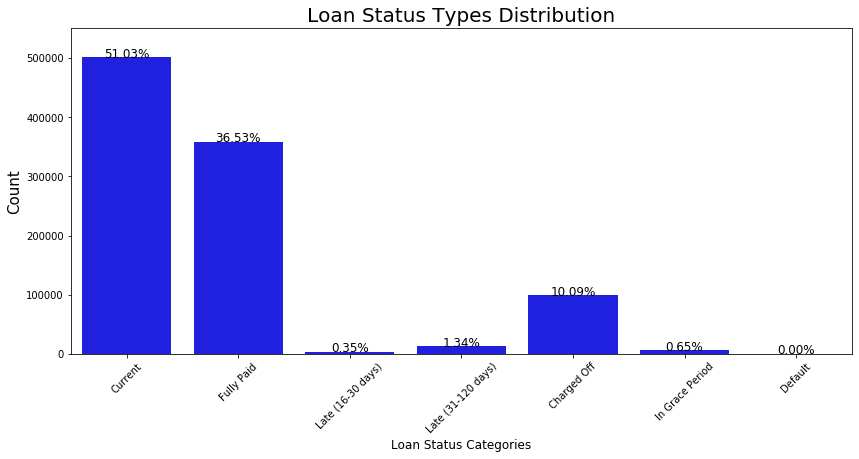

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

total = len(data_raw)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=data_raw, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

# From the figure and as explained by mam "Current is Non Risky and Rest are Risky"

#Recently mam said "Current and Fully Paid are Non Risky and the rest are Risky"

In [17]:
# We have to clean some columns like interest rate etc
import re
def int_rate_pick(text):
    text=str(text).strip()
    try:
        if len(text) >0:
            int_rate=re.compile(r'\d+(\.\d{1,2})?')
            int_rate=int_rate.search(text)[0]
            return float(int_rate)
        else:
            return 0
    except:
        return 0
    
##Looking at the data it looks 2018-01 last quarter. So we consider epoc 2018-02 when we have the data and doing analysis
from datetime import datetime

def date_diff(col_value_provided,today=datetime(2018,2,1,0,0,0)):
    diff = today-col_value_provided
    return diff.days
# int_rate_pick('nan' )
# date_diff(datetime(2018,1,1,0,0,0))

In [18]:
#columns with maximum Blank. 5 are printed
blank_columns=list(column_explantion[column_explantion['Percent_Missing'] > 0.99]['Name'].values)
blank_columns

['member_id',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [19]:
# importtant date column for feature creation. 'issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d'
# Drop columns to reduce the data size
data_raw=data_raw.drop(blank_columns,axis=1)

data_raw['int_rate_float']=data_raw['int_rate'].apply(int_rate_pick)
data_raw['revol_util_float']=data_raw['revol_util'].apply(int_rate_pick)
data_raw['days_since_issue']=data_raw['issue_d'].apply(date_diff)
data_raw['days_since_last_payment']=data_raw['last_pymnt_d'].apply(date_diff)
data_raw['days_since_next_payment']=data_raw['next_pymnt_d'].apply(date_diff)
data_raw['days_since_last_credit_pull']=data_raw['last_credit_pull_d'].apply(date_diff)
data_raw['years_since_credit_line']=data_raw['earliest_cr_line'].apply(date_diff).apply(lambda x: x/365)

data_raw=data_raw.drop(['int_rate','revol_util','last_pymnt_d','next_pymnt_d','last_credit_pull_d','int_rate','revol_util','earliest_cr_line'],axis=1)
data_raw.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,hardship_flag,disbursement_method,debt_settlement_flag,int_rate_float,revol_util_float,days_since_issue,days_since_last_payment,days_since_next_payment,days_since_last_credit_pull,years_since_credit_line
0,104046719,14000.0,14000.0,14000.0,36 months,492.13,C,C5,Project Leader,10+ years,...,N,Cash,N,15.99,63.2,337.0,62.0,31.0,62.0,21.769863
1,104048967,5000.0,5000.0,5000.0,36 months,200.10,E,E4,Pilot,10+ years,...,N,Cash,N,25.49,18.8,337.0,62.0,31.0,62.0,14.095890
2,104028593,4600.0,4600.0,4600.0,36 months,151.45,B,B3,cable technician,4 years,...,N,Cash,N,11.39,19.1,337.0,62.0,31.0,62.0,14.180822
3,104046702,14000.0,14000.0,14000.0,60 months,316.69,C,C1,Specialty Sales,4 years,...,N,Cash,N,12.74,46.2,337.0,62.0,31.0,62.0,44.030137
4,104280113,15000.0,15000.0,15000.0,36 months,451.73,A,A1,Executive Account Manager,10+ years,...,N,Cash,N,5.32,33.7,337.0,62.0,31.0,62.0,43.282192


In [20]:
data_raw.shape

(981665, 130)

In [21]:
y = data_raw['loan_status'].copy()
y = y.isin(['Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')
y.value_counts()

0    859576
1    122089
Name: loan_status, dtype: int64

In [22]:
y.value_counts()/y.shape[0]

# Only 4% are risky

0    0.875631
1    0.124369
Name: loan_status, dtype: float64

In [23]:
## 'emp_title' and 'url' are high cardinality. We will ignore url column

data_raw['emp_length'][:100000].value_counts(normalize=True) * 100

10+ years    37.030785
2 years      10.076236
3 years       9.086999
< 1 year      7.802067
1 year        7.120354
5 years       6.706380
4 years       6.393480
6 years       4.694573
9 years       3.965549
7 years       3.587058
8 years       3.536521
Name: emp_length, dtype: float64

In [24]:
data_raw['emp_title'][:100000].value_counts(normalize=True) * 100

#Not any useful column

Teacher                           2.010829
Manager                           1.798766
Owner                             1.546874
Driver                            0.841793
Registered Nurse                  0.814881
                                    ...   
Field Client Manager              0.001076
Rail/Train Mechanic               0.001076
Sr Implementation Specialist      0.001076
nc milling operator               0.001076
Sr. Manager, Campaign Strategy    0.001076
Name: emp_title, Length: 36487, dtype: float64

In [25]:
# data_raw=data_raw.reset_index().drop(['index'],axis=1)
pd.set_option('display.max_rows', 152)
column_explantion2=colume_details(data_raw)
column_explantion2[column_explantion2['dtypes']=='object']

Dataset Shape: (981665, 130)


,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,object,0,981665,0.000000,981665,104046719,104048967,104028593,19.90
4,term,object,10,981655,0.000010,2,36 months,36 months,36 months,0.89
6,grade,object,10,981655,0.000010,7,C,E,B,2.32
7,sub_grade,object,10,981655,0.000010,35,C5,E4,B3,4.62
8,emp_title,object,59595,922070,0.060708,232289,Project Leader,Pilot,cable technician,13.91
9,emp_length,object,57995,923670,0.059078,11,10+ years,10+ years,4 years,3.04
10,home_ownership,object,10,981655,0.000010,5,MORTGAGE,MORTGAGE,RENT,1.38
12,verification_status,object,10,981655,0.000010,3,Source Verified,Source Verified,Not Verified,1.57
14,loan_status,object,10,981655,0.000010,7,Current,Current,Current,1.52
15,pymnt_plan,object,10,981655,0.000010,2,n,n,n,0.01


In [26]:
column_explantion2[column_explantion2['dtypes']!='object']

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
1,loan_amnt,float64,10,981655,0.000010,1549,14000,5000,4600,6.91
2,funded_amnt,float64,10,981655,0.000010,1549,14000,5000,4600,6.91
3,funded_amnt_inv,float64,10,981655,0.000010,1556,14000,5000,4600,7.18
5,installment,float64,10,981655,0.000010,67063,492.13,200.1,151.45,13.45
11,annual_inc,float64,10,981655,0.000010,51776,82000,215000,44470,8.25
13,issue_d,datetime64[ns],10,981655,0.000010,33,2017-03-01 00:00:00,2017-03-01 00:00:00,2017-03-01 00:00:00,4.95
22,dti,float64,304,981361,0.000310,7006,31.07,6.06,13.43,11.74
23,delinq_2yrs,float64,10,981655,0.000010,31,0,0,0,1.07
24,fico_range_low,float64,10,981655,0.000010,38,725,765,770,4.31
25,fico_range_high,float64,10,981655,0.000010,38,729,769,774,4.31


In [27]:
categorical_features=list(column_explantion2[column_explantion2['dtypes']=='object']['Name'].values)
categorical_features=[x for x in categorical_features if x not in ['id','url','int_rate','revol_util','emp_title','loan_status']]
categorical_features,len(categorical_features)

(['term',
  'grade',
  'sub_grade',
  'emp_length',
  'home_ownership',
  'verification_status',
  'pymnt_plan',
  'desc',
  'purpose',
  'title',
  'zip_code',
  'addr_state',
  'initial_list_status',
  'application_type',
  'verification_status_joint',
  'sec_app_earliest_cr_line',
  'hardship_flag',
  'disbursement_method',
  'debt_settlement_flag'],
 19)

In [28]:
numerical_features=list(column_explantion2[column_explantion2['dtypes']=='float64']['Name'].values)
numerical_features[:5],len(numerical_features)

(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc'],
 106)

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
    
class LabelEncoderByCol(BaseEstimator, TransformerMixin):
    def __init__(self,col):
        #List of column names in the DataFrame that should be encoded
        self.col = col
        #Dictionary storing a LabelEncoder for each column
        self.le_dic = {}
        for el in self.col:
            self.le_dic[el] = LabelEncoderExt()

    def fit(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            self.le_dic[el].fit(a)
        return self

    def transform(self,x,y=None):
        #Fill missing values with the string 'NaN'
        x[self.col] = x[self.col].fillna('NaN')
        for el in self.col:
            #Only use the values that are not 'NaN' to fit the Encoder
            a = x[el][x[el]!='NaN']
            #Store an ndarray of the current column
            b = x[[el]].values
            #Replace the elements in the ndarray that are not 'NaN'
            #using the transformer
            b[b!='NaN'] = self.le_dic[el].transform(a)
            #Overwrite the column in the DataFrame
            x[el]=b
        #return the transformed DataFrame
        return x
    

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        if type(X)==np.ndarray:
            return X
        else:
            return X.todense()

In [31]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

numeric_features = numerical_features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = categorical_features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore')),
#     ('labelencoder', LabelEncoderByCol(categorical_features))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', LogisticRegression(penalty='l1',solver='saga'))])
#                         ('classifier', LogisticRegression(penalty='l2',solver='lbfgs'))])

X=data_raw.drop(['loan_status'],axis=1)
y = data_raw['loan_status'].copy()
y = y.isin(['Late (31-120 days)','Charged Off','In Grace Period','Late (16-30 days)','Default']).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# clf.fit(X_train, y_train)
# print("model score: %.3f" % clf.score(X_test, y_test)) ##0.981


preprocessor_new = Pipeline(steps=[('preprocessor', preprocessor),
                              ('to_dense', DenseTransformer())
                                  ])

In [32]:
preprocessor_method = preprocessor_new.fit(X_train)
X_train_new=preprocessor_method.transform(X_train)
X_train_new.shape

(687165, 125)

In [33]:
##Originl data before transformation
X_train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,...,hardship_flag,disbursement_method,debt_settlement_flag,int_rate_float,revol_util_float,days_since_issue,days_since_last_payment,days_since_next_payment,days_since_last_credit_pull,years_since_credit_line
639777,63621135,24000.0,24000.0,23900.0,60 months,537.40,C,C1,COO,1 year,...,N,Cash,N,12.29,68.0,823.0,488.0,NaN,184.0,28.857534
295234,23353053,24000.0,24000.0,24000.0,60 months,558.19,C,C3,Financial Manager - AP,1 year,...,N,Cash,N,13.98,64.8,1280.0,62.0,31.0,62.0,23.772603
752678,56452614,15000.0,15000.0,15000.0,36 months,464.95,A,A4,manager,10+ years,...,N,Cash,N,7.26,33.3,946.0,92.0,NaN,92.0,20.350685
418575,11684847,25000.0,25000.0,24975.0,60 months,638.25,D,D3,Director of Nursing,6 years,...,N,Cash,N,18.25,95.7,1461.0,62.0,31.0,62.0,16.515068
157835,108776269,20000.0,20000.0,20000.0,60 months,466.20,C,C3,NaN,NaN,...,N,Cash,N,14.08,41.6,276.0,62.0,31.0,62.0,23.687671


In [34]:
pd.set_option('display.max_columns', 152)
X_train_new=pd.DataFrame(X_train_new,columns=numerical_features+categorical_features)
#Data after transformation
X_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,int_rate_float,revol_util_float,days_since_issue,days_since_last_payment,days_since_next_payment,days_since_last_credit_pull,years_since_credit_line,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,disbursement_method,debt_settlement_flag
0,1.02003,1.02003,1.00967,0.372627,0.251241,-0.270478,-0.374929,-1.12323,-1.12321,-0.664359,2.47648,0.0138949,-0.324249,-0.360523,0.308439,0.333487,-0.700272,-0.700255,1.69215,1.68132,1.96011,0.151602,-0.123085,-0.170557,-0.166343,3.12336,0.316149,0.277525,-0.127595,6.71066,0,-0.0288099,-0.00623779,-0.0712795,-0.022842,-0.475695,0.0508206,-0.162832,-0.375687,-0.202633,-0.163199,-0.163264,0.0471966,-0.117584,-0.17516,-0.142232,0.0234159,0.056202,-0.348126,-0.29969,-0.249973,-0.184815,-0.417514,-0.305491,0.473268,-0.0889002,-0.0187912,0.459925,1.34753,0.317402,1.21213,0.69196,-0.172338,2.39411,1.47196,2.36746,1.08151,1.00162,0.663172,1.41676,0.850661,0.0559467,-0.0694157,0.30545,0.0896671,-0.316188,-0.0262623,-0.0587059,-0.179821,-1.16925,-2.73895,0.110769,-0.354903,-0.141215,-0.475578,0.331391,0.475303,0.284393,-0.036341,-0.00444192,-0.00444211,-0.0810955,-0.0483456,-0.030368,0.013358,-0.0406343,-0.0281531,-0.0174008,-0.0299421,-0.181377,0.638027,0.0305585,0.680312,-0.00433784,0.204704,1.28726,60 months,C,C1,1 year,MORTGAGE,Verified,n,missing,debt_consolidation,Debt consolidation,782xx,TX,w,Individual,missing,missing,N,Cash,N
1,1.02003,1.02003,1.02096,0.453284,-0.0280312,-0.20733,-0.374929,0.647012,0.646995,0.451771,-0.119614,0.0138949,-0.681547,-0.360523,0.412643,-0.832907,0.581948,0.582322,1.23358,1.23442,0.715306,2.39728,-0.123085,-0.170557,-0.166343,-0.441849,1.7014,1.21686,-0.127595,-0.0110841,0,-0.0288099,-0.00623779,-0.0712795,-0.022842,-0.701141,0.0508206,-0.162832,-0.375687,-0.202633,-0.163199,-0.163264,0.0471966,-0.117584,-0.17516,-0.142232,0.0234159,0.202205,-0.348126,-0.29969,-0.249973,-0.184815,-0.589538,0.153472,0.129724,-0.0889002,-0.0187912,0.421249,0.587122,-0.443709,-0.235122,-0.834581,-0.109168,-0.0439639,-0.122896,-0.0840487,-0.386505,-0.308389,-0.226194,-0.253983,-0.201323,-0.889607,-0.501879,-0.308008,-0.214709,-0.674496,-0.0262623,-0.0587059,-0.179821,0.507674,0.67558,0.808486,-0.354903,-0.141215,-0.653284,-0.403022,0.586495,-0.644558,-0.036341

In [41]:
labelencoder = LabelEncoderByCol(categorical_features)
cat_label_transformer=labelencoder.fit(X_train_new)
X_train_new=cat_label_transformer.transform(X_train_new)
X_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,int_rate_float,revol_util_float,days_since_issue,days_since_last_payment,days_since_next_payment,days_since_last_credit_pull,years_since_credit_line,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,disbursement_method,debt_settlement_flag
0,1.02003,1.02003,1.00967,0.372627,0.251241,-0.270478,-0.374929,-1.12323,-1.12321,-0.664359,2.47648,0.0138949,-0.324249,-0.360523,0.308439,0.333487,-0.700272,-0.700255,1.69215,1.68132,1.96011,0.151602,-0.123085,-0.170557,-0.166343,3.12336,0.316149,0.277525,-0.127595,6.71066,0,-0.0288099,-0.00623779,-0.0712795,-0.022842,-0.475695,0.0508206,-0.162832,-0.375687,-0.202633,-0.163199,-0.163264,0.0471966,-0.117584,-0.17516,-0.142232,0.0234159,0.056202,-0.348126,-0.29969,-0.249973,-0.184815,-0.417514,-0.305491,0.473268,-0.0889002,-0.0187912,0.459925,1.34753,0.317402,1.21213,0.69196,-0.172338,2.39411,1.47196,2.36746,1.08151,1.00162,0.663172,1.41676,0.850661,0.0559467,-0.0694157,0.30545,0.0896671,-0.316188,-0.0262623,-0.0587059,-0.179821,-1.16925,-2.73895,0.110769,-0.354903,-0.141215,-0.475578,0.331391,0.475303,0.284393,-0.036341,-0.00444192,-0.00444211,-0.0810955,-0.0483456,-0.030368,0.013358,-0.0406343,-0.0281531,-0.0174008,-0.0299421,-0.181377,0.638027,0.0305585,0.680312,-0.00433784,0.204704,1.28726,1,2,10,0,1,3,2,10444,3,461,726,43,3,0,4,545,0,0,0
1,1.02003,1.02003,1.02096,0.453284,-0.0280312,-0.20733,-0.374929,0.647012,0.646995,0.451771,-0.119614,0.0138949,-0.681547,-0.360523,0.412643,-0.832907,0.581948,0.582322,1.23358,1.23442,0.715306,2.39728,-0.123085,-0.170557,-0.166343,-0.441849,1.7014,1.21686,-0.127595,-0.0110841,0,-0.0288099,-0.00623779,-0.0712795,-0.022842,-0.701141,0.0508206,-0.162832,-0.375687,-0.202633,-0.163199,-0.163264,0.0471966,-0.117584,-0.17516,-0.142232,0.0234159,0.202205,-0.348126,-0.29969,-0.249973,-0.184815,-0.589538,0.153472,0.129724,-0.0889002,-0.0187912,0.421249,0.587122,-0.443709,-0.235122,-0.834581,-0.109168,-0.0439639,-0.122896,-0.0840487,-0.386505,-0.308389,-0.226194,-0.253983,-0.201323,-0.889607,-0.501879,-0.308008,-0.214709,-0.674496,-0.0262623,-0.0587059,-0.179821,0.507674,0.67558,0.808486,-0.354903,-0.141215,-0.653284,-0.403022,0.586495,-0.644558,-0.036341,-0.00444192,-0.00444211,-0.0810955,-0.0483456,-0.030368,0.013358,-0.0406343,-0.02815

In [42]:
X_train_new[categorical_features].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,disbursement_method,debt_settlement_flag
0,1,2,10,0,1,3,2,10444,3,461,726,43,3,0,4,545,0,0,0
1,1,2,12,0,1,1,2,10444,2,329,179,38,3,0,4,545,0,0,0
2,0,0,3,1,1,0,2,10444,2,329,721,43,3,0,4,545,0,0,0
3,1,3,17,6,1,1,2,4436,3,461,135,34,1,0,4,545,0,0,0
4,1,2,12,12,4,0,2,10444,3,461,789,3,3,0,4,545,0,0,0


In [43]:
#We can see all the labels are categorical which will be used for Random Forest
X_train_new[categorical_features].dtypes

term                         object
grade                        object
sub_grade                    object
emp_length                   object
home_ownership               object
verification_status          object
pymnt_plan                   object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
initial_list_status          object
application_type             object
verification_status_joint    object
sec_app_earliest_cr_line     object
hardship_flag                object
disbursement_method          object
debt_settlement_flag         object
dtype: object

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(max_depth=10, random_state=0)
rf_clf.fit(X_train_new,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = numerical_features+categorical_features,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
last_fico_range_low,1.822523e-01
last_fico_range_high,1.688915e-01
recoveries,1.177574e-01
collection_recovery_fee,1.134977e-01
days_since_last_payment,7.866495e-02
last_pymnt_amnt,6.275636e-02
total_rec_prncp,5.089695e-02
out_prncp_inv,2.318077e-02
out_prncp,2.288027e-02
total_pymnt_inv,2.008733e-02


In [47]:
#keep top 60 features
top60_features=list(feature_importances.reset_index()['index'].iloc[:60])

In [48]:
#Recursive feature elimination technique
import warnings
warnings.filterwarnings('ignore')

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 50)  # Top 50 features
fit = rfe.fit(X_train_new,y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 50
Selected Features: [False  True  True  True  True False False  True  True False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False  True False False False  True
  True  True False False  True  True  True False  True  True False False
 False False False  True False False  True False False False False  True
 False False False False False False False  True False False False False
 False  True False False False False False False  True False False False
 False False  True False False  True False  True False  True False  True
 False False False  True False False  True False  True  True False  True
 False False  True  True False False  True False False False False  True
 False False  True False  True]
Feature Ranking: [75  1  1  1  1 60 29  1  1 40 37 13  7 44 17  1  1  1  1  1  1  1  1  1
  1  1  1  1 49 23 76  1 57  2 62  1  1  1 39 27  1  1  1 48  1  1 32  9
 41  3 22  1 11 53  1 33 51 42 25  1 34

In [49]:
top_50_features2=list(X_train_new.columns[fit.support_])

In [50]:
#There are 33 common features which we will pick up for our model
len(set(top_50_features2).intersection(set(top60_features))), set(top_50_features2).intersection(set(top60_features))

(38,
 {'acc_open_past_24mths',
  'annual_inc',
  'collection_recovery_fee',
  'days_since_last_credit_pull',
  'days_since_last_payment',
  'debt_settlement_flag',
  'fico_range_high',
  'fico_range_low',
  'funded_amnt',
  'funded_amnt_inv',
  'grade',
  'hardship_flag',
  'il_util',
  'installment',
  'int_rate_float',
  'last_fico_range_high',
  'last_fico_range_low',
  'last_pymnt_amnt',
  'max_bal_bc',
  'mths_since_rcnt_il',
  'num_rev_accts',
  'open_acc_6m',
  'open_act_il',
  'open_rv_24m',
  'out_prncp',
  'out_prncp_inv',
  'pct_tl_nvr_dlq',
  'recoveries',
  'tot_cur_bal',
  'total_acc',
  'total_bal_il',
  'total_bc_limit',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_int',
  'total_rec_late_fee',
  'total_rec_prncp',
  'verification_status'})

In [51]:
imp_features=list(set(top_50_features2).intersection(set(top60_features)))
X_train_new=X_train_new[imp_features]

In [52]:
column_explantion2[column_explantion2['Name'].isin(imp_features)][column_explantion2['dtypes']=='object']

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
6,grade,object,10,981655,0.00001,7,C,E,B,2.32
12,verification_status,object,10,981655,0.00001,3,Source Verified,Source Verified,Not Verified,1.57
120,hardship_flag,object,10,981655,0.00001,2,N,N,N,0.01
122,debt_settlement_flag,object,10,981655,0.00001,2,N,N,N,0.07


In [53]:
column_explantion2[column_explantion2['Name'].isin(imp_features)][column_explantion2['dtypes']!='object']

,Name,dtypes,Missing,Non_Missing,Percent_Missing,Uniques,First Value,Second Value,Third Value,Entropy
2,funded_amnt,float64,10,981655,0.000010,1549,14000,5000,4600,6.91
3,funded_amnt_inv,float64,10,981655,0.000010,1556,14000,5000,4600,7.18
5,installment,float64,10,981655,0.000010,67063,492.13,200.1,151.45,13.45
11,annual_inc,float64,10,981655,0.000010,51776,82000,215000,44470,8.25
24,fico_range_low,float64,10,981655,0.000010,38,725,765,770,4.31
25,fico_range_high,float64,10,981655,0.000010,38,729,769,774,4.31
32,total_acc,float64,10,981655,0.000010,139,31,16,11,5.52
34,out_prncp,float64,10,981655,0.000010,224610,11438.3,4190.59,3708.5,9.82
35,out_prncp_inv,float64,10,981655,0.000010,233964,11438.3,4190.59,3708.5,9.87
36,total_pymnt,float64,10,981655,0.000010,683576,3912.17,1586.64,1205.78,18.82


In [37]:
# from sklearn.feature_selection import SelectFromModel
# model = SelectFromModel(logistic_clf_l1, prefit=True)
# X_new = model.transform(X_train_new)
# X_new.shape

# #1701 features are kept(out of 2886) but this is esoteric and thus explainability will be a challenge

(259949, 1701)

In [171]:
#Now we will balance data and do modeling again  SMOTE (Synthetic Minority Over-sampling Technique)
# from imblearn.over_sampling import SMOTE
# smote =SMOTE('minority')

# X_sm,Y_sm=smote.fit_sample(X_train_new,y_train)


Using TensorFlow backend.


In [106]:
# Y_sm.value_counts()
# y_train.value_counts()
X_train_new=X_train_new[imp_features].reset_index()
X_train_new=X_train_new.drop(['index'],axis=1)
y_train=y_train.reset_index()
y_train=y_train.drop(['index','level_0'],axis=1)
X_train2=pd.concat((X_train_new,y_train),axis=1)
X_train_positive=X_train2[X_train2['loan_status']==1]
X_train_negative=X_train2[X_train2['loan_status']==0]
X_train_positive.shape,X_train_negative.shape

((85445, 39), (601720, 39))

In [107]:
## Total X_sm record is 437670, 40000 chossen for grid search
# chosen_idx = np.random.choice(40000, replace = True, size = 437670) 
model_data=pd.concat((X_train_positive,X_train_negative.sample(X_train_positive.shape[0])),axis=0)
model_data=model_data.reset_index()
model_data=model_data.drop(['index'],axis=1)
model_data.head()

,hardship_flag,il_util,installment,fico_range_high,open_rv_24m,funded_amnt_inv,total_rec_late_fee,funded_amnt,debt_settlement_flag,max_bal_bc,grade,fico_range_low,last_fico_range_low,last_fico_range_high,open_acc_6m,total_rec_int,total_bal_il,verification_status,recoveries,acc_open_past_24mths,last_pymnt_amnt,total_pymnt,num_rev_accts,days_since_last_payment,annual_inc,total_rec_prncp,open_act_il,total_bc_limit,tot_cur_bal,int_rate_float,out_prncp_inv,mths_since_rcnt_il,collection_recovery_fee,days_since_last_credit_pull,total_pymnt_inv,pct_tl_nvr_dlq,out_prncp,total_acc,loan_status
0,0,0.0471966,0.763886,0.00328285,-0.17516,1.13098,-0.123085,1.13284,0,-0.142232,3,0.00328694,-0.513496,-0.850375,0.0508206,3.94897,-0.163264,1,-0.170557,0.135145,-0.428005,1.9832,0.30545,-0.691539,-0.0696249,1.11216,-0.162832,-0.103351,0.327984,1.09873,0.301882,-0.163199,-0.166343,-0.463402,1.98118,0.67558,0.302589,0.666742,1
1,0,0.0471966,1.95598,-0.962286,-0.17516,1.9068,6.28916,1.90557,0,-0.142232,5,-0.9623,-1.55171,-2.38144,0.0508206,3.16918,-0.163264,3,-0.170557,-1.14469,-0.374868,0.36071,-0.921467,1.07319,0.0373303,-0.561499,-0.162832,-0.81589,-0.836414,2.67094,-0.700255,-0.163199,-0.166343,-0.129349,0.361243,-1.02067,-0.700272,0.333487,1
2,0,0.0471966,0.207588,-0.318573,-0.17516,0.00534871,-0.123085,0.00477328,0,-0.142232,1,-0.318576,-1.05732,-1.65236,0.0508206,-0.566529,-0.163264,3,2.30044,0.135145,-0.445484,-0.665904,1.0416,1.66251,0.616671,-0.7845,-0.162832,0.436726,2.6895,-0.344612,-0.700255,-0.163199,2.38067,1.86949,-0.665732,0.67558,-0.700272,1.16662,1
3,0,0.421285,-0.329274,-0.640429,1.07877,-0.558879,-0.123085,-0.559261,0,0.377286,3,-0.640438,-6.69335,-2.74598,1.56332,-0.689763,-0.430351,3,-0.170557,0.775064,-0.476731,-0.996622,1.28698,-0.102223,0.0135624,-0.945021,-0.162832,0.754418,-0.550649,0.828103,-0.700255,-0.812802,-0.166343,-0.463402,-0.996566,-0.326749,-0.700272,0.666742,1
4,0,0.0471966,-0.414587,-0.640429,-0.17516,-0.558879,2.14453,-0.559261,0,-0.142232,1,-0.640438,-6.69335,-2.74598,0.0508206,-0.285485,-0.163264,0,0.681754,-0.824734,-0.480534,-0.412293,-0.308008,1.07319,-0.307303,-0.45097,-0.162832,-0.761428,-0.849413,-0.138421,-0.700255,-0.163199,0.712187,1.53544,-0.412032,-1.26299,-0.700272,-0.666279,1


In [108]:
model_data.tail()

,hardship_flag,il_util,installment,fico_range_high,open_rv_24m,funded_amnt_inv,total_rec_late_fee,funded_amnt,debt_settlement_flag,max_bal_bc,grade,fico_range_low,last_fico_range_low,last_fico_range_high,open_acc_6m,total_rec_int,total_bal_il,verification_status,recoveries,acc_open_past_24mths,last_pymnt_amnt,total_pymnt,num_rev_accts,days_since_last_payment,annual_inc,total_rec_prncp,open_act_il,total_bc_limit,tot_cur_bal,int_rate_float,out_prncp_inv,mths_since_rcnt_il,collection_recovery_fee,days_since_last_credit_pull,total_pymnt_inv,pct_tl_nvr_dlq,out_prncp,total_acc,loan_status
170885,0,0.0471966,-0.498503,1.29071,-0.17516,-0.570163,-0.123085,-0.559261,0,-0.142232,0,1.29074,0.673036,0.899411,0.0508206,-0.409729,-0.163264,3,-0.170557,-0.824734,-0.484275,-0.113175,-0.4307,-0.691539,-0.326317,0.00838893,-0.162832,0.0373412,-0.79009,-1.12642,-0.503684,-0.163199,-0.166343,-0.463402,-0.123146,0.67558,-0.501771,-0.916221,0
170886,0,0.122014,0.525561,1.77349,1.07877,1.19023,-0.123085,1.18925,0,-1.33009,2,1.77353,-0.117985,-0.267113,3.07582,0.115812,0.196497,0,-0.170557,0.135145,-0.438628,-0.533632,-0.308008,-0.691539,0.132402,-0.651994,0.373611,0.350495,0.690383,-0.0847249,2.1853,-0.747842,-0.166343,-0.463402,-0.533414,0.67558,2.18448,-0.0830826,0
170887,0,0.0471966,-0.706878,0.164211,-0.17516,-0.525025,-0.123085,-0.525419,0,-0.142232,3,0.164218,-0.0191078,-0.121298,0.0508206,1.01129,-0.163264,1,-0.170557,-1.46465,-0.493563,0.0689379,-0.921467,-0.691539,-0.325129,-0.222653,-0.162832,-0.416505,-0.767192,0.952677,-0.224808,-0.163199,-0.166343,-0.463402,0.0693682,0.67558,-0.224957,-1.16616,0
170888,0,-0.476527,0.886987,-0.479501,-0.17516,1.56262,-0.123085,1.56151,0,-1.19145,2,-0.479507,0.524719,0.680687,-1.46168,0.242154,-0.31912,1,-0.170557,-0.184815,-0.422517,-0.506204,0.182758,-0.691539,-0.105277,-0.659292,-0.162832,-0.716044,0.56038,0.183754,2.62003,-0.033278,-0.166343,-0.463402,-0.505976,0.67558,2.61909,-0.0830826,0
170889,0,0.0471966,-0.835991,2.57813,-0.17516,-0.840992,-0.123085,-0.841278,0,-0.142232,0,2.57819,1.2663,1.7743,0.0508206,-0.68623,-0.163264,0,-0.170557,-0.824734,-0.499318,-0.570506,-0.4307,-0.691539,0.00167853,-0.443905,-0.162832,1.73473,0.650116,-1.67841,-0.35932,-0.163199,-0.166343,-0.463402,-0.570301,0.67558,-0.359431,-0.749593,0


In [109]:
model_data['loan_status'].value_counts()

1    85445
0    85445
Name: loan_status, dtype: int64

In [110]:
chosen_idx = np.random.choice(20000, replace = True, size = model_data.shape[0])
model_data_x,model_data_y=model_data[model_data.columns[:-1]],model_data[model_data.columns[-1]]

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [119]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 15, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 300, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 9, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [120]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(model_data_x.iloc[chosen_idx], model_data_y[chosen_idx])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.8s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [121]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [122]:
rf_best=RandomForestClassifier(**rf_random.best_params_)
rf_best.fit(model_data_x,model_data_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
X_test_new=preprocessor_method.transform(X_test)
X_test_new=pd.DataFrame(X_test_new,columns=numerical_features+categorical_features)
X_test_new=cat_label_transformer.transform(X_test_new)
X_test_new=X_test_new[imp_features]

print("model score test: %.3f" % rf_best.score(X_test_new, y_test))

model score test: 0.974


In [90]:
[x for x in model_data_x.columns if x not in imp_features]

['level_0']

In [186]:
y_test.value_counts()

0    93794
1     3688
Name: loan_status, dtype: int64

In [124]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(rf_best.predict(X_test_new),y_test)

0.9241900684269531

In [125]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,auc
y_pred=rf_best.predict(X_test_new)
print("precesion : %.3f" %precision_score(y_pred,y_test))
print("recall : %.3f" %recall_score(y_pred,y_test))
print("f1_score : %.3f" %f1_score(y_pred,y_test))
print("classification matrix \n" , classification_report(y_pred,y_test))

precesion : 0.950
recall : 0.856
f1_score : 0.900
classification matrix 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    253791
           1       0.95      0.86      0.90     40709

    accuracy                           0.97    294500
   macro avg       0.96      0.92      0.94    294500
weighted avg       0.97      0.97      0.97    294500



(0, 1)

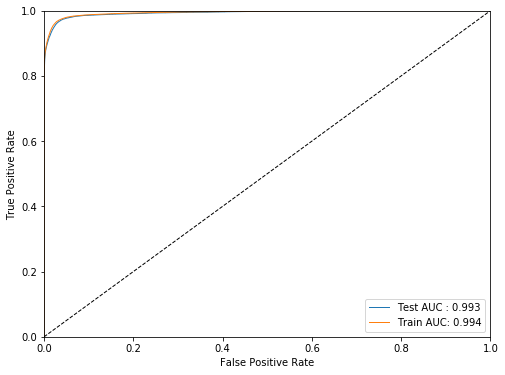

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn import metrics
# figure size in inches
rcParams['figure.figsize'] = 8,6

tp_unbalset, fp_unbalset ,threshold_unbalset= roc_curve(y_test, rf_best.predict_proba(X_test_new[imp_features])[:,1])
tp_train, fp_train ,threshold_train= roc_curve(model_data_y, rf_best.predict_proba(model_data_x)[:,1])

train_auc=metrics.auc( tp_train,fp_train,)
test_auc=metrics.auc(tp_unbalset,fp_unbalset)
plt.plot( tp_unbalset,fp_unbalset, lw=1)
plt.plot( tp_train,fp_train, lw=1)

plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.legend(['Test AUC : %.3f' %test_auc ,'Train AUC: %.3f' % train_auc])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier


# models = {'GBM': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
#           'ADB': AdaBoostClassifier(n_estimators=100, random_state=0),
#           'LR': LogisticRegression(C=0.5,penalty='l2',solver='lbfgs'),
#           'SVM': SVC(gamma='auto',probability=True),
#           'ANN' : MLPClassifier(solver='lbfgs', alpha=1e-5,
#                                 hidden_layer_sizes=(21,8,2), random_state=1)}
# unbalset={}
# for i in models.keys():
    
#     scores = cross_val_score(models[i], X_sm, Y_sm, cv=3)
#     unbalset[i] = scores
#     print(i, scores, np.mean(scores))

GBM [0.97076565 0.97468641 0.97450134] 0.9733177965133547
ADB [0.97043663 0.97428199 0.97408321] 0.9729339456668266
LR [0.93269587 0.934197   0.93244225] 0.9331117051659926


In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

models = {'LR1': LogisticRegression(C=0.1,penalty='l2',solver='lbfgs'),
          'LR2': LogisticRegression(C=0.5,penalty='l2',solver='lbfgs'),
          'LR3': LogisticRegression(C=1,penalty='l1',solver='saga'),
          'DT': DecisionTreeClassifier(random_state=0),
          'ANN' : MLPClassifier(solver='lbfgs', alpha=1e-4,
                                hidden_layer_sizes=(27,12), random_state=1)}

model_set={}
for i in models.keys():
    chosen_idx = np.random.choice( model_data.shape[0],size=10000)
    model=models[i].fit(X=model_data_x.iloc[chosen_idx], y=model_data_y[chosen_idx])
    model_set[i] = model
    y_pred=model.predict(X_test_new)
    print("\n\nPrinting for : ", i)
    print("precesion : %.3f" %precision_score(y_pred,y_test))
    print("recall : %.3f" %recall_score(y_pred,y_test))
    print("f1_score : %.3f" %f1_score(y_pred,y_test))
    print("classification matrix \n" , classification_report(y_pred,y_test))




Printing for :  LR1
precesion : 0.900
recall : 0.793
f1_score : 0.843
classification matrix 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    252883
           1       0.90      0.79      0.84     41617

    accuracy                           0.96    294500
   macro avg       0.93      0.89      0.91    294500
weighted avg       0.96      0.96      0.96    294500



Printing for :  LR2
precesion : 0.903
recall : 0.804
f1_score : 0.851
classification matrix 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    253361
           1       0.90      0.80      0.85     41139

    accuracy                           0.96    294500
   macro avg       0.94      0.90      0.91    294500
weighted avg       0.96      0.96      0.96    294500



Printing for :  LR3
precesion : 0.901
recall : 0.793
f1_score : 0.843
classification matrix 
               precision    recall  f1-score   support

   

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

models = {'LR1': LogisticRegression(C=0.1,penalty='l2',solver='lbfgs'),
          'LR2': LogisticRegression(C=0.5,penalty='l2',solver='lbfgs'),
          'LR3': LogisticRegression(C=1,penalty='l1',solver='saga'),
          'DT': DecisionTreeClassifier(random_state=0),
          'ANN' : MLPClassifier(solver='lbfgs', alpha=1e-4,
                                hidden_layer_sizes=(27,12), random_state=1)}

model_set={}
score_all=pd.DataFrame()
for i in models.keys():
    chosen_idx = np.random.choice( model_data.shape[0],size=10000)
    model=models[i].fit(X=model_data_x.iloc[chosen_idx], y=model_data_y[chosen_idx])
    model_set[i] = model
    y_pred=model.predict(X_test_new)
    score_all[i]=y_pred
#     print("\n\nPrinting for : ", i)
#     print("precesion : %.3f" %precision_score(y_pred,y_test))
#     print("recall : %.3f" %recall_score(y_pred,y_test))
#     print("f1_score : %.3f" %f1_score(y_pred,y_test))
#     print("classification matrix \n" , classification_report(y_pred,y_test))
score_all['Test']=y_test.values

In [177]:
def ensemble_predict(rowx):
    return sum(rowx[:-1])>2
        
score_all['ENS']=score_all.apply(lambda row: int(sum(row[:-1])>2),axis=1)

In [181]:

score_all.head()

,LR1,LR2,LR3,DT,ANN,Test,ENS
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1
3,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0


In [173]:
print("\n\nPrinting for : Ensemble Prediction")
print("precesion : %.3f" %precision_score(score_all['Ensemble_Prediction'],y_test))
print("recall : %.3f" %recall_score(score_all['Ensemble_Prediction'],y_test))
print("f1_score : %.3f" %f1_score(score_all['Ensemble_Prediction'],y_test))
print("classification matrix \n" , classification_report(score_all['Ensemble_Prediction'],y_test))



Printing for : Ensemble Prediction
precesion : 0.955
recall : 0.816
f1_score : 0.880
classification matrix 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    251620
           1       0.96      0.82      0.88     42880

    accuracy                           0.97    294500
   macro avg       0.96      0.90      0.93    294500
weighted avg       0.97      0.97      0.97    294500



(0, 1)

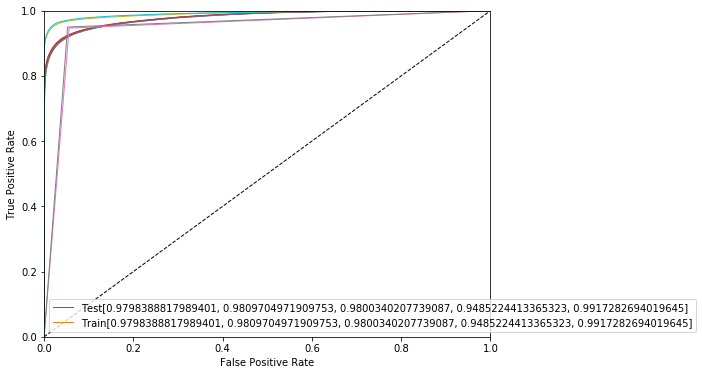

In [156]:
rcParams['figure.figsize'] = 8,6

model_set={}
train_auc=[]
test_auc=[]
tp_unbalset, fp_unbalset ,threshold_unbalset= roc_curve(y_test, models[i].predict_proba(X_test_new[imp_features])[:,1])
tp_train, fp_train ,threshold_train= roc_curve(model_data_y, models[i].predict_proba(model_data_x)[:,1])

train_auc.append(metrics.auc( tp_train,fp_train))
test_auc.append(metrics.auc(tp_unbalset,fp_unbalset))
plt.plot( tp_unbalset,fp_unbalset, lw=1)
plt.plot( tp_train,fp_train, lw=1)
plt.legend(['Test'  + str(train_auc) ,'Train' + str(train_auc)])
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
##SVM
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svm_grid.fit(X_sm, Y_sm) 

In [ ]:
# print best parameter after tuning 
print(svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(svm_grid.best_estimator_) 

In [ ]:
grid_predictions = svm_grid.predict(X_test_new[imp_features]) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

In [ ]:
#Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(30,50,10), (35,20,5), (25,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

mlp_grid = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
mlp_grid.fit(X_sm, Y_sm)

In [ ]:
# Best paramete set
print('Best parameters found:\n', mlp_grid.best_params_)

# All results
means = mlp_grid.cv_results_['mean_test_score']
stds = mlp_grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mlp_grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    

In [ ]:
y_true, y_pred = y_test , mlp_grid.predict(X_test_new[imp_features])

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
#grid Search for logistic Regression. 
# We are maximizing recall concisely


from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
lr_grid = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
lr_grid.fit(X_sm, Y_sm)

#Predict values based on new parameters
y_pred_acc = lr_grid.predict(X_test_new[imp_features])

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

In [ ]:
# Best paramete set
print('Best parameters found:\n', lr_grid.best_params_)

# All results
means = lr_grid.cv_results_['mean_test_score']
stds = lr_grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lr_grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
#grid Search for Adaboost 
# We are maximizing recall concisely


from sklearn.model_selection import GridSearchCV
adb = AdaBoostClassifier()
grid_values = {'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']}
adb_grid = GridSearchCV(adb, param_grid = grid_values,scoring = 'recall')
adb_grid.fit(X_sm, Y_sm)

#Predict values based on new parameters
y_pred_acc = adb_grid.predict(X_test_new[imp_features])

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

In [ ]:
# Best paramete set
print('Best parameters found:\n', adb_grid.best_params_)

# All results
means = adb_grid.cv_results_['mean_test_score']
stds = adb_grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, adb_grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))